
=== Logistic Regression ===
Accuracy:  0.7979
Precision: 0.7959
Recall:    0.7979
F1 Score:  0.7929

Classification Report:
                    precision    recall  f1-score   support

       alt.atheism       0.75      0.72      0.74       155
     comp.graphics       0.91      0.90      0.90       195
         sci.space       0.77      0.91      0.83       201
talk.religion.misc       0.72      0.55      0.62       127

          accuracy                           0.80       678
         macro avg       0.79      0.77      0.78       678
      weighted avg       0.80      0.80      0.79       678

Confusion Matrix:


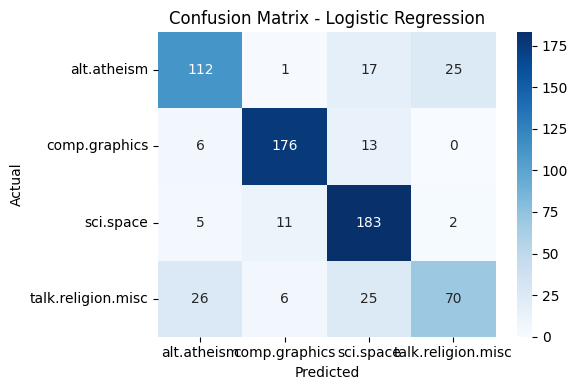


=== K-Nearest Neighbors ===
Accuracy:  0.3437
Precision: 0.3583
Recall:    0.3437
F1 Score:  0.3086

Classification Report:
                    precision    recall  f1-score   support

       alt.atheism       0.27      0.22      0.24       155
     comp.graphics       0.45      0.24      0.31       195
         sci.space       0.34      0.70      0.45       201
talk.religion.misc       0.35      0.09      0.15       127

          accuracy                           0.34       678
         macro avg       0.35      0.31      0.29       678
      weighted avg       0.36      0.34      0.31       678

Confusion Matrix:


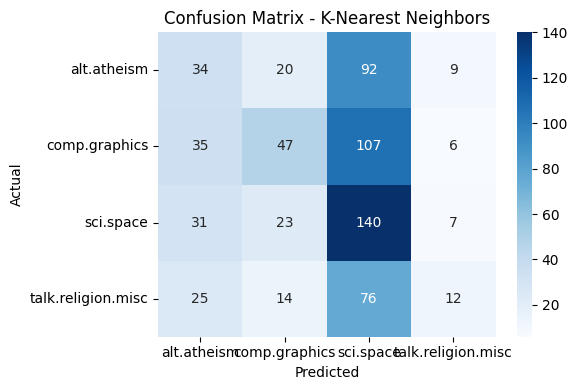


=== Naive Bayes ===
Accuracy:  0.7906
Precision: 0.7891
Recall:    0.7906
F1 Score:  0.7813

Classification Report:
                    precision    recall  f1-score   support

       alt.atheism       0.68      0.80      0.74       155
     comp.graphics       0.88      0.92      0.90       195
         sci.space       0.82      0.88      0.85       201
talk.religion.misc       0.74      0.44      0.55       127

          accuracy                           0.79       678
         macro avg       0.78      0.76      0.76       678
      weighted avg       0.79      0.79      0.78       678

Confusion Matrix:


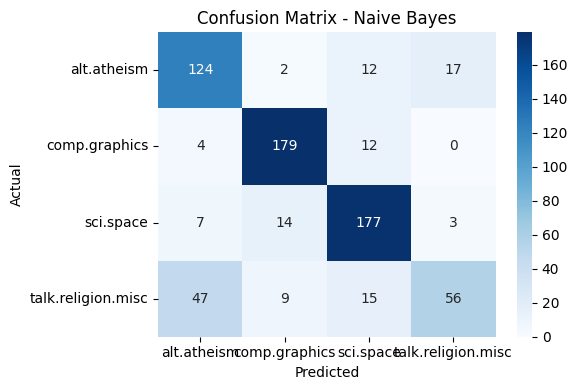


=== Decision Tree ===
Accuracy:  0.6386
Precision: 0.6259
Recall:    0.6386
F1 Score:  0.6284

Classification Report:
                    precision    recall  f1-score   support

       alt.atheism       0.50      0.54      0.52       155
     comp.graphics       0.79      0.83      0.81       195
         sci.space       0.67      0.75      0.71       201
talk.religion.misc       0.45      0.30      0.36       127

          accuracy                           0.64       678
         macro avg       0.60      0.60      0.60       678
      weighted avg       0.63      0.64      0.63       678

Confusion Matrix:


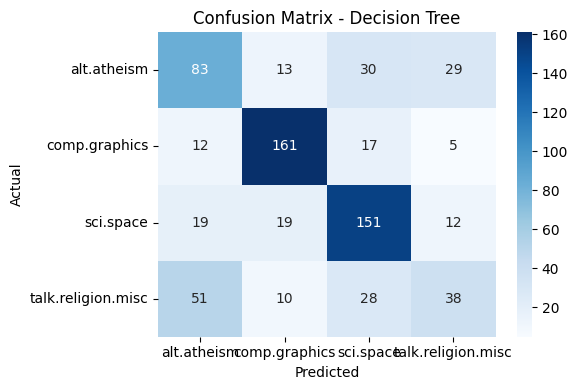


=== SVM (Linear) ===
Accuracy:  0.7773
Precision: 0.7722
Recall:    0.7773
F1 Score:  0.7734

Classification Report:
                    precision    recall  f1-score   support

       alt.atheism       0.71      0.64      0.67       155
     comp.graphics       0.89      0.91      0.90       195
         sci.space       0.79      0.89      0.84       201
talk.religion.misc       0.63      0.57      0.60       127

          accuracy                           0.78       678
         macro avg       0.76      0.75      0.75       678
      weighted avg       0.77      0.78      0.77       678

Confusion Matrix:


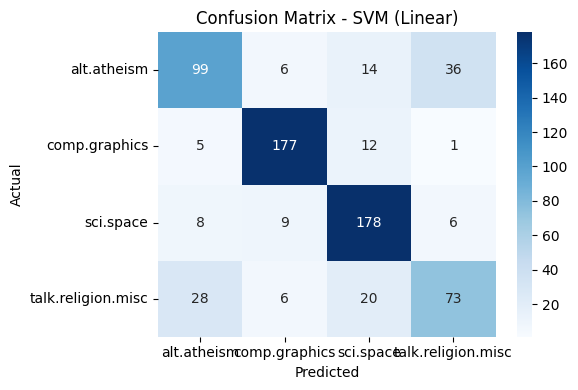

In [1]:
import pandas as pd
from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix
)
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Load Dataset
categories = ['alt.atheism', 'comp.graphics', 'sci.space', 'talk.religion.misc']
newsgroups = fetch_20newsgroups(subset='all', categories=categories, remove=('headers', 'footers', 'quotes'))
X, y = newsgroups.data, newsgroups.target
target_names = newsgroups.target_names

# 2. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. TF-IDF Vectorization
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# 4. Define Models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Naive Bayes": MultinomialNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "SVM (Linear)": LinearSVC()
}

# 5. Train and Evaluate Models
for name, model in models.items():
    print(f"\n=== {name} ===")
    model.fit(X_train_tfidf, y_train)
    y_pred = model.predict(X_test_tfidf)
    
    # Metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    rec = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
    
    print(f"Accuracy:  {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall:    {rec:.4f}")
    print(f"F1 Score:  {f1:.4f}")
    
    # Classification Report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=target_names, zero_division=0))
    
    # Confusion Matrix
    print("Confusion Matrix:")
    cm = confusion_matrix(y_test, y_pred)
    df_cm = pd.DataFrame(cm, index=target_names, columns=target_names)
    plt.figure(figsize=(6, 4))
    sns.heatmap(df_cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()
